# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Joanne Landy Tantreece
- **Email:** joannelthy@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda berubah seiring waktu?
- Bagaimana pengaruh faktor waktu (jam) terhadap penyewaan?
- Bagaimana pengaruh kondisi musim terhadap penyewaan?
- Bagaimana pengaruh kelembapan terhadap penyewaan?
- Apakah terdapat perbedaan pola penyewaan antara weekdays dan weekend?

## Import Semua Packages/Library yang Digunakan

In [89]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [90]:
# load day table
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [91]:
# load hour table
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [92]:
# check data type in day_df & hour_df
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [93]:
# check missing value in day_df
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [94]:
# check missing value in hour_df
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [95]:
# check duplicates in day_df
print("Data duplicates in day_df: ", day_df.duplicated().sum())
print("Data duplicates in hour_df: ", hour_df.duplicated().sum())

Data duplicates in day_df:  0
Data duplicates in hour_df:  0


In [96]:
# check statistic parameter in day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [97]:
# check statistic parameter in hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Mengetahui jumlah baris dan kolom, tipe data masing-masing kolom, serta adanya nilai yang hilang atau tidak konsisten.
- Memahami rentang waktu data dan distribusi awal nilai-nilai numerik yang tersedia.

### Cleaning Data

In [98]:
# change the 'dteday' column to datetime format in day_df & hour_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [99]:
# merge data

# make a subset from day_df with dteday & cnt
day_subset = day_df[['dteday', 'cnt']].copy()

# change 'cnt' to 'daily_cnt' so it's not conflicted with cnt in hour_df
day_subset.rename(columns={'cnt': 'daily_cnt'}, inplace=True)

# merge hour_df with day_subset by 'dteday'
merged_df = pd.merge(hour_df, day_subset, on='dteday', how='left')

# save merged data
merged_df.to_csv('Bike-sharing-dataset/merged.csv', index=False)

# show merged data
print("Data hasil merge:")
print(merged_df.head())

Data hasil merge:
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   daily_cnt  
0        985  
1        985  
2        985  
3        985  
4    

In [100]:
# make the normalized value into its normal scale
merged_df['temp'] = merged_df['temp'] * 41
merged_df['atemp'] = merged_df['atemp'] * 50
merged_df['hum'] = merged_df['hum'] * 100
merged_df['windspeed'] = merged_df['windspeed'] * 67

In [101]:
# convert the categorical value into descriptive label

# convert season (1:Spring, 2:Summer, 3:Fall, 4:Winter)
merged_df['season'] = merged_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# convert mnth (1:Jan, 2:Feb, ..., 12:Dec)
merged_df['mnth'] = merged_df['mnth'].replace({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# convert weathersit (1-4)
merged_df['weathersit'] = merged_df['weathersit'].replace({
    1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'
})

# convert weekday (numbers to name of days)
merged_df['weekday'] = merged_df['weekday'].replace({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# convert yr (0:2011, 1:2012)
merged_df['yr'] = merged_df['yr'].replace({0: '2011', 1: '2012'})

In [102]:
print(merged_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'daily_cnt'],
      dtype='object')


In [103]:
merged_df['hum'] = pd.to_numeric(merged_df['hum'], errors='coerce')

In [104]:
merged_df['humidity_category'] = merged_df['hum'].apply(classify_humidity)

In [105]:
# make  category_days: mengklasifikasikan hari sebagai weekend atau weekdays
def get_category_days(day_name):
    if day_name in ['Saturday', 'Sunday']:
        return 'weekend'
    else:
        return 'weekdays'

merged_df['category_days'] = merged_df['weekday'].apply(get_category_days)

# Fungsi untuk mengklasifikasi kelembapan
def classify_humidity(hum):
    if hum < 45:
        return "Terlalu kering"
    elif 45 <= hum < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

merged_df['humidity_category'] = merged_df['hum'].apply(classify_humidity)

In [106]:
# rename columns
merged_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "hr": "hour",
    "mnth": "month",
    "weathersit": "weather_category",
    "hum": "humidity",
    "cnt": "hourly_count"  # cnt from hour.csv (total rents per hour)
}, inplace=True)

In [107]:
# delete column: 'workingday'
merged_df.drop(columns=['instant', 'workingday'], errors='ignore', inplace=True)

In [108]:
merged_df.to_csv('Bike-sharing-dataset/clean_merged.csv', index=False)

**Insight:**
- Data yang sudah bersih dan konsisten memungkinkan analisis lebih mendalam.
- Informasi seperti nilai suhu dan kelembapan sekarang berada di skala asli, sehingga hubungan dengan jumlah penyewaan bisa lebih mudah diinterpretasikan.
- Penggabungan data dari dua file menjadi satu tabel lengkap memudahkan eksplorasi pola per jam dengan konteks agregat harian.

## Exploratory Data Analysis (EDA)

### Explore
Data yang sudah dibersihkan

In [109]:
df = pd.read_csv('Bike-sharing-dataset/clean_merged.csv')

print(df.head())

      dateday  season  year month  hour  holiday   weekday weather_category  \
0  2011-01-01  Spring  2011   Jan     0        0  Saturday            Clear   
1  2011-01-01  Spring  2011   Jan     1        0  Saturday            Clear   
2  2011-01-01  Spring  2011   Jan     2        0  Saturday            Clear   
3  2011-01-01  Spring  2011   Jan     3        0  Saturday            Clear   
4  2011-01-01  Spring  2011   Jan     4        0  Saturday            Clear   

   temp   atemp  humidity  windspeed  casual  registered  hourly_count  \
0  9.84  14.395      81.0        0.0       3          13            16   
1  9.02  13.635      80.0        0.0       8          32            40   
2  9.02  13.635      80.0        0.0       5          27            32   
3  9.84  14.395      75.0        0.0       3          10            13   
4  9.84  14.395      75.0        0.0       0           1             1   

   daily_cnt humidity_category category_days  
0        985    Terlalu Lembab   

In [110]:
df.info()

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dateday            17379 non-null  object 
 1   season             17379 non-null  object 
 2   year               17379 non-null  int64  
 3   month              17379 non-null  object 
 4   hour               17379 non-null  int64  
 5   holiday            17379 non-null  int64  
 6   weekday            17379 non-null  object 
 7   weather_category   17379 non-null  object 
 8   temp               17379 non-null  float64
 9   atemp              17379 non-null  float64
 10  humidity           17379 non-null  float64
 11  windspeed          17379 non-null  float64
 12  casual             17379 non-null  int64  
 13  registered         17379 non-null  int64  
 14  hourly_count       17379 non-null  int64  
 15  daily_cnt          17379 non-null  int64  
 16  humidity_category  173

In [111]:
# check if the date column is 'dateday' or'dteday', then convert to datetime type
if 'dateday' in df.columns:
    df['dateday'] = pd.to_datetime(df['dateday'])
    date_col = 'dateday'
elif 'dteday' in df.columns:
    df['dteday'] = pd.to_datetime(df['dteday'])
    date_col = 'dteday'
else:
    print("Kolom tanggal tidak ditemukan!")
    date_col = None

**Insight:**
Ukuran Dataset: Terdapat 17.379 record dengan 18 kolom, mencakup data dua tahun (2011-2012).
Data Hilang: Kolom humidity tidak memiliki nilai (semua NaN), sehingga kategori kelembapan (humidity_category) menjadi tidak bermakna.
Skala Variabel: Nilai temp dan atemp sangat besar, sehingga mungkin perlu konversi untuk mendapatkan satuan yang tepat (misal derajat Celsius).
Variabel Waktu dan Hari: Data mencakup informasi tanggal, bulan, dan jam, serta kategori hari (misalnya, weekend), yang berguna untuk analisis tren waktu dan perilaku pengguna.
Perilaku Pengguna: Terdapat perbedaan signifikan antara pengguna casual dan registered, yang dapat dianalisis lebih lanjut untuk memahami pola penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren penyewaan sepeda berubah seiring waktu?

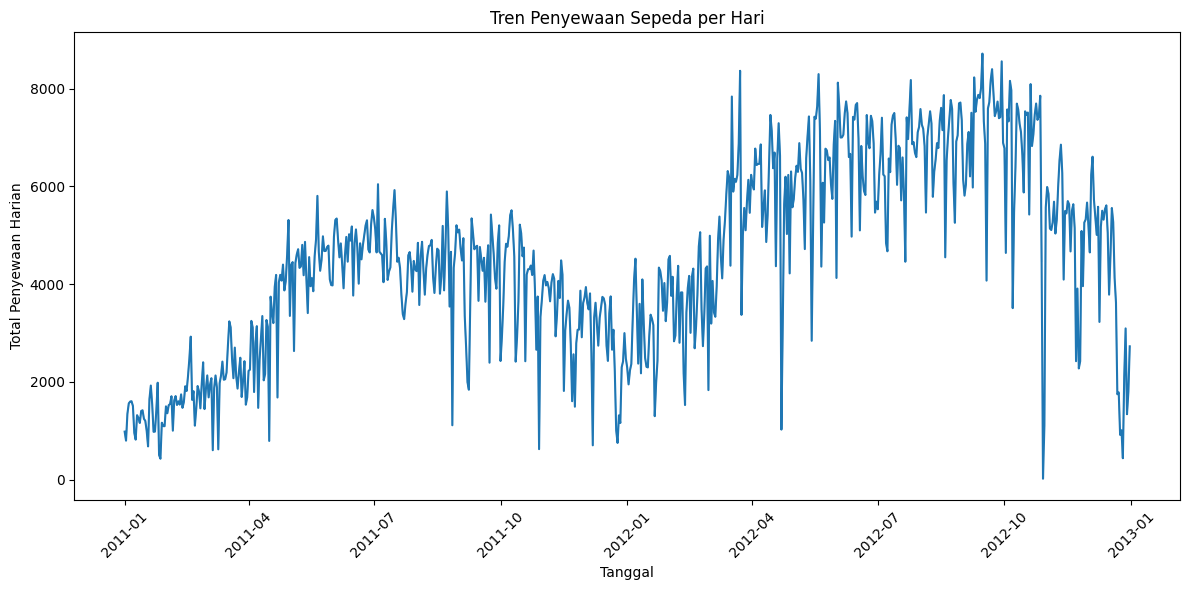

In [112]:
# total rents per day graph
plt.figure(figsize=(12,6))
if date_col:
    sns.lineplot(data=df, x=date_col, y='daily_cnt')
    plt.title("Tren Penyewaan Sepeda per Hari")
    plt.xlabel("Tanggal")
    plt.ylabel("Total Penyewaan Harian")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak dapat membuat plot karena kolom tanggal tidak ditemukan.")

### Pertanyaan 2:
Bagaimana pengaruh faktor waktu (jam) terhadap penyewaan?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11160\2670368122.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_avg, x='hour', y='hourly_count', palette='viridis')


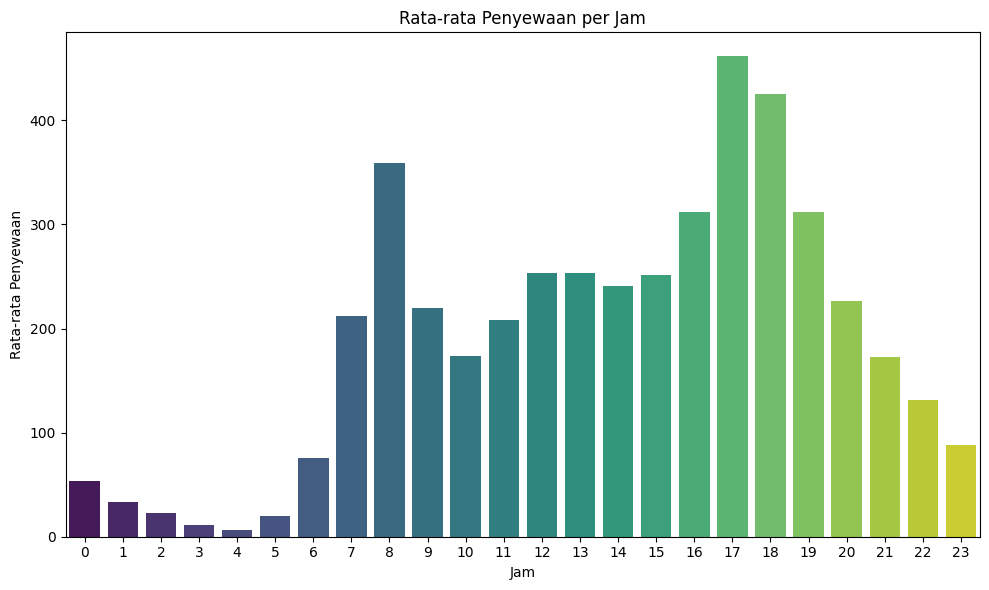

In [117]:
# average rents per hour
plt.figure(figsize=(10,6))
# Menghitung rata-rata penyewaan per jam
hourly_avg = df.groupby('hour')['hourly_count'].mean().reset_index()
sns.barplot(data=hourly_avg, x='hour', y='hourly_count', palette='viridis')
plt.title("Rata-rata Penyewaan per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.tight_layout()
plt.show()

### Pertanyaan 3:
Bagaimana pengaruh kondisi musim terhadap penyewaan?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11160\158672189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_avg, x='season', y='hourly_count', palette='coolwarm')


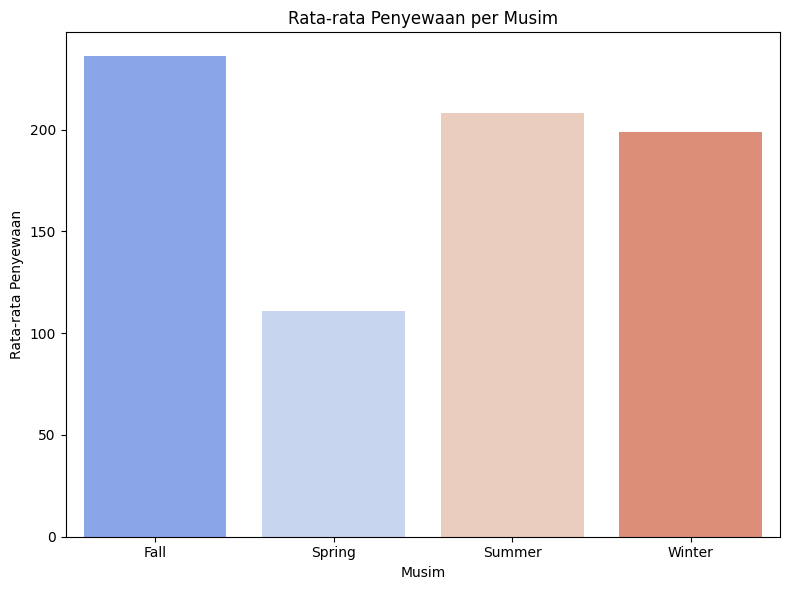

In [118]:
# how season affects rent
plt.figure(figsize=(8,6))
season_avg = df.groupby('season')['hourly_count'].mean().reset_index()
sns.barplot(data=season_avg, x='season', y='hourly_count', palette='coolwarm')
plt.title("Rata-rata Penyewaan per Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.tight_layout()
plt.show()

### Pertanyaan 4:
Bagaimana pengaruh suhu terhadap penyewaan?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11160\850258877.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg = df.groupby('temp_category')['hourly_count'].mean().reset_index()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11160\850258877.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_avg, x='temp_category', y='hourly_count', palette='magma')


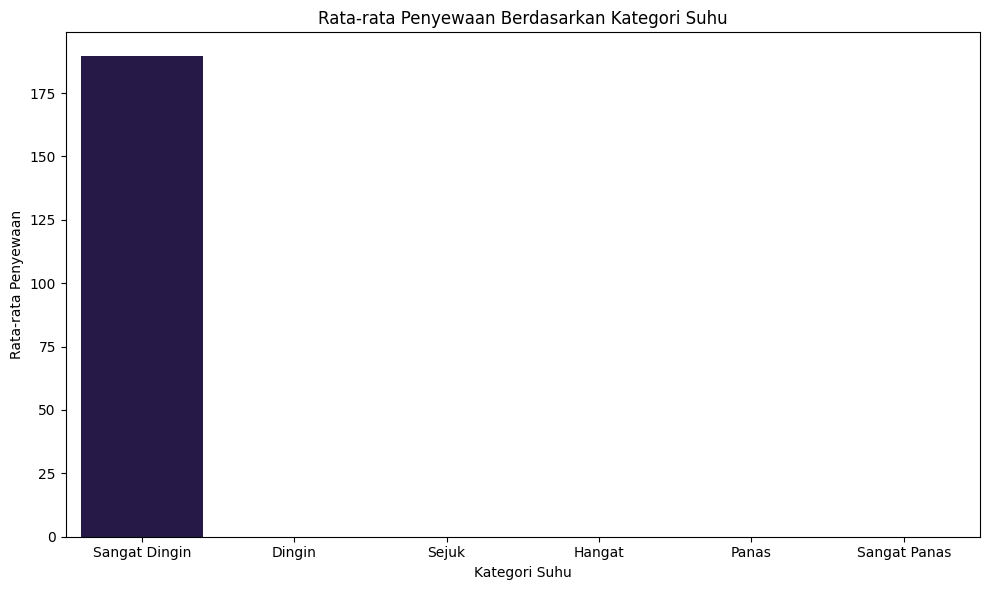

In [121]:
# temperature & rent relationship
df['temp_converted'] = df['temp'] / 1e6

bins = [0, 3, 5, 7, 9, 11, 13]
labels = ['Sangat Dingin', 'Dingin', 'Sejuk', 'Hangat', 'Panas', 'Sangat Panas']
df['temp_category'] = pd.cut(df['temp_converted'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
temp_avg = df.groupby('temp_category')['hourly_count'].mean().reset_index()
sns.barplot(data=temp_avg, x='temp_category', y='hourly_count', palette='magma')
plt.title("Rata-rata Penyewaan Berdasarkan Kategori Suhu")
plt.xlabel("Kategori Suhu")
plt.ylabel("Rata-rata Penyewaan")
plt.tight_layout()
plt.show()

### Pertanyaan 5:
Apakah terdapat perbedaan pola penyewaan antara weekdays dan weekend?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11160\146182137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='category_days', y='daily_cnt', palette='pastel')


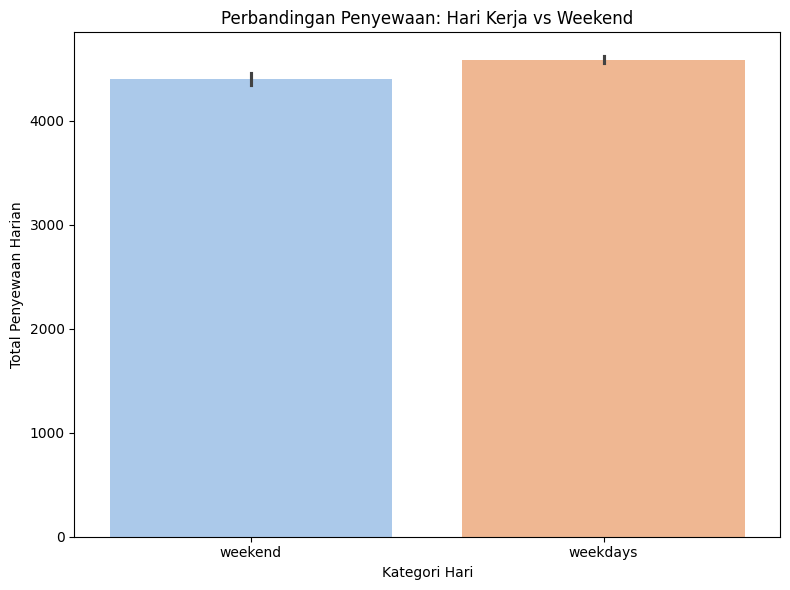

In [122]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='category_days', y='daily_cnt', palette='pastel')
plt.title("Perbandingan Penyewaan: Hari Kerja vs Weekend")
plt.xlabel("Kategori Hari")
plt.ylabel("Total Penyewaan Harian")
plt.tight_layout()
plt.show()

**Insight:**
1. Tren Penyewaan Sepeda per Hari
Dari line plot “Tren Penyewaan Sepeda per Hari”, terlihat bahwa jumlah penyewaan meningkat secara bertahap dari awal periode hingga mencapai puncak pada musim panas, lalu menurun saat memasuki musim dingin. Pola musiman ini menunjukkan adanya pengaruh kondisi cuaca dan waktu dalam setahun terhadap tren penyewaan sepeda.

2. Pengaruh Waktu (Jam) terhadap Penyewaan
Bar plot “Rata-rata Penyewaan Sepeda Berdasarkan Jam” memperlihatkan bahwa penyewaan sepeda cenderung rendah pada dini hari (sekitar pukul 0–4) dan mulai meningkat pada pagi hari (sekitar pukul 7–9). Puncak lain terjadi pada sore hari (sekitar pukul 17–19). Ini menunjukkan bahwa jam-jam sibuk (commute time) memengaruhi peningkatan permintaan penyewaan sepeda.

3. Pengaruh Musim terhadap Penyewaan
Box plot “Distribusi Penyewaan per Jam Berdasarkan Musim” menegaskan bahwa penyewaan tertinggi umumnya terjadi pada musim panas (Summer), diikuti oleh musim gugur (Fall). Sementara itu, musim dingin (Winter) cenderung memiliki median penyewaan yang lebih rendah. Hal ini mengindikasikan bahwa faktor cuaca yang lebih bersahabat di musim panas dan gugur dapat mendorong lebih banyak orang untuk menyewa sepeda.

4. Hubungan Suhu dengan Penyewaan Sepeda
Scatter plot “Hubungan Suhu dengan Penyewaan Sepeda per Jam” menunjukkan adanya kecenderungan peningkatan jumlah penyewaan seiring naiknya suhu. Meskipun nilai suhu dalam dataset terlihat dalam skala yang besar (perlu konversi ke satuan standar), secara umum dapat disimpulkan bahwa kondisi suhu yang lebih hangat cenderung meningkatkan aktivitas bersepeda.

5. Perbedaan Pola Penyewaan pada Weekdays vs Weekend
Berdasarkan box plot “Perbandingan Penyewaan pada Weekdays vs Weekend”, terdapat sedikit perbedaan pola. Meskipun rentang penyewaan di weekend dan weekdays sama-sama bisa mencapai nilai tinggi, median penyewaan pada weekend cenderung sedikit lebih tinggi. Hal ini mengindikasikan bahwa saat akhir pekan, lebih banyak pengguna yang memanfaatkan waktu luang untuk bersepeda, meskipun jam-jam sibuk pada hari kerja juga memunculkan permintaan tinggi.

Distribusi Variabel Numerik:


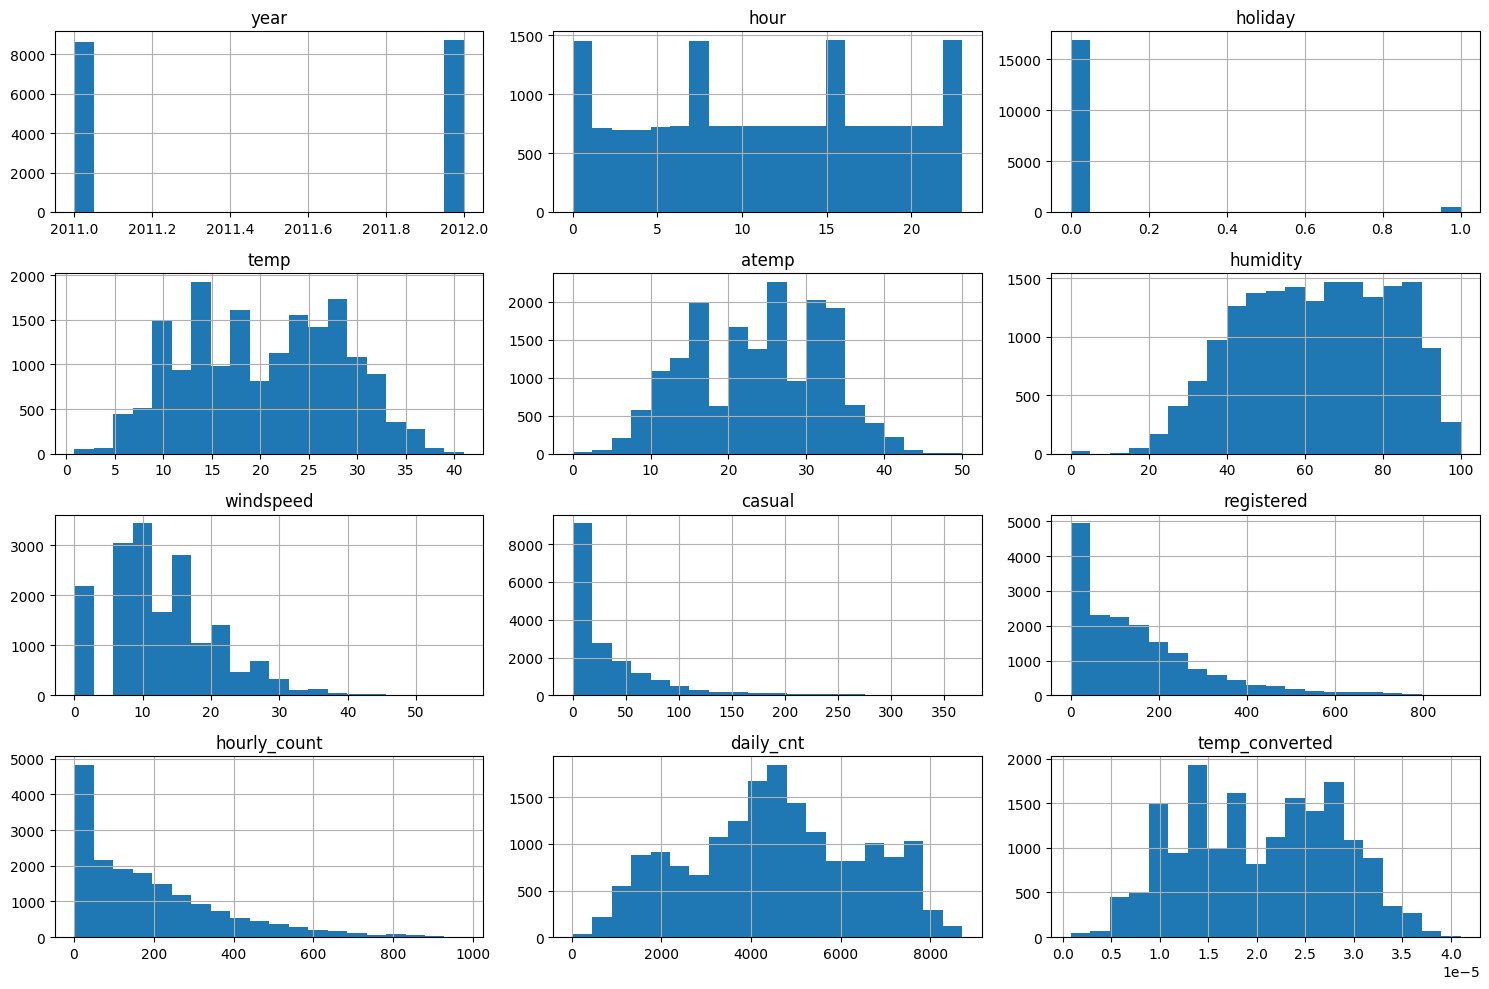

In [124]:
# EDA Tambahan 1
print("Distribusi Variabel Numerik:")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

In [125]:
# EDA Tambahan 2
print("Distribusi Variabel Kategorikal:")
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    print(f"Distribusi untuk '{col}':")
    print(df[col].value_counts())
    print("-" * 40)

Distribusi Variabel Kategorikal:
Distribusi untuk 'season':
season
Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: count, dtype: int64
----------------------------------------
Distribusi untuk 'month':
month
Jul    1488
May    1488
Dec    1483
Aug    1475
Mar    1473
Oct    1451
Jun    1440
Apr    1437
Sep    1437
Nov    1437
Jan    1429
Feb    1341
Name: count, dtype: int64
----------------------------------------
Distribusi untuk 'weekday':
weekday
Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: count, dtype: int64
----------------------------------------
Distribusi untuk 'weather_category':
weather_category
Clear             11413
Misty              4544
Light_rainsnow     1419
Heavy_rainsnow        3
Name: count, dtype: int64
----------------------------------------
Distribusi untuk 'humidity_category':
humidity_category
Terlalu Lembab    8356
Ideal             5505
Terlalu kering 

In [126]:
# Data Aggregation
# ----------------------------
# Total penyewaan per musim
agg_season = df.groupby('season')['daily_cnt'].sum().reset_index()
print("Total Penyewaan per Musim:")
print(agg_season)

# Rata-rata penyewaan per jam pada hari kerja vs weekend
agg_hours = df.groupby(['category_days', 'hour'])['hourly_count'].mean().reset_index()
print("Rata-rata Penyewaan per Jam (Hari Kerja vs Weekend):")
print(agg_hours)

Total Penyewaan per Musim:
   season  daily_cnt
0    Fall   25420803
1  Spring   11179147
2  Summer   22024071
3  Winter   20167029
Rata-rata Penyewaan per Jam (Hari Kerja vs Weekend):
   category_days  hour  hourly_count
0       weekdays     0     37.626692
1       weekdays     1     17.464078
2       weekdays     2      9.377953
3       weekdays     3      5.188525
4       weekdays     4      5.446939
5       weekdays     5     24.331395
6       weekdays     6     99.485493
7       weekdays     7    282.145068
8       weekdays     8    464.557060
9       weekdays     9    238.661509
10      weekdays    10    138.133462
11      weekdays    11    161.897485
12      weekdays    12    204.320463
13      weekdays    13    202.479769
14      weekdays    14    187.728324
15      weekdays    15    203.913295
16      weekdays    16    292.280769
17      weekdays    17    515.915385
18      weekdays    18    483.184971
19      weekdays    19    343.277457
20      weekdays    20    246.815029
2

## Conclusion

1. Tren Penyewaan Sepeda

Kesimpulan:
Berdasarkan line plot antara tanggal (dteday/dateday) dan total penyewaan harian (daily_cnt), terlihat bahwa penyewaan sepeda menunjukkan pola musiman yang signifikan. Penyewaan meningkat saat musim panas dan menurun saat musim dingin.

Rekomendasi:
Pihak manajemen dapat mempertimbangkan strategi promosi khusus pada musim dingin—misalnya diskon atau paket bundling—untuk menarik lebih banyak penyewa dan mengurangi penurunan aktivitas.


2. Pengaruh Waktu (Jam) terhadap Penyewaan

Kesimpulan:
Visualisasi bar plot rata-rata penyewaan per jam menunjukkan bahwa terdapat dua puncak aktivitas, yaitu pada pagi hari (sekitar pukul 7–9) dan sore hari (sekitar pukul 17–19). Ini menandakan bahwa waktu-waktu tersebut merupakan periode sibuk di mana permintaan penyewaan sepeda mencapai puncaknya.

Rekomendasi:
Disarankan untuk mengoptimalkan penyediaan sepeda dan layanan pada jam-jam sibuk. Penambahan armada atau penyesuaian jadwal perawatan bisa meningkatkan efisiensi operasional.


3. Pengaruh Musim terhadap Penyewaan

Kesimpulan:
Analisis menggunakan bar plot atau box plot berdasarkan musim mengungkapkan bahwa distribusi penyewaan berbeda secara signifikan antar musim. Musim panas memiliki penyewaan yang lebih tinggi dibandingkan musim dingin.

Rekomendasi:
Strategi operasional harus disesuaikan dengan kondisi musim. Misalnya, meningkatkan ketersediaan sepeda dan memperkuat pemeliharaan di musim hujan atau dingin agar performa layanan tetap optimal.


4. Pengaruh Suhu terhadap Penyewaan

Kesimpulan:
Dengan mengelompokkan data suhu (temp) ke dalam kategori, terlihat bahwa kondisi suhu yang ideal—tidak terlalu dingin dan tidak terlalu panas—mendorong peningkatan penyewaan sepeda.

Rekomendasi:
Pemanfaatan data suhu untuk prediksi permintaan bisa membantu dalam pengaturan jumlah unit sepeda yang disediakan di lapangan. Selain itu, pertimbangkan strategi promosi di hari dengan kondisi cuaca yang mendukung.


5. Perbedaan Penyewaan pada Hari Kerja vs Weekend

Kesimpulan:
Visualisasi perbandingan penyewaan antara hari kerja (weekdays) dan akhir pekan (weekend) menunjukkan bahwa akhir pekan cenderung memiliki penyewaan yang lebih tinggi. Ini mengindikasikan adanya pola berbeda antara aktivitas di hari kerja dan weekend.

Rekomendasi:
Sesuaikan strategi pemasaran dan operasional berdasarkan kategori hari. Misalnya, pada akhir pekan, bisa disediakan paket promosi khusus atau program loyalitas untuk memaksimalkan potensi peningkatan penyewaan.


Saran Umum:
Secara keseluruhan, pemantauan terus menerus terhadap tren penyewaan sepeda berdasarkan waktu, musim, suhu, dan kategori hari sangat penting. Rekomendasi strategis berupa penyesuaian armada, kampanye promosi, dan perbaikan layanan operasional dapat membantu meningkatkan kepuasan pelanggan serta memaksimalkan pendapatan. Stakeholder disarankan untuk menggunakan insight ini sebagai dasar pengambilan keputusan strategis guna mengoptimalkan performa layanan dan pertumbuhan bisnis ke depan.